In [386]:
#import all required liabraries
#WE use Box-Cox,log,sqrt Transform technique to remove skewness from columns
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import sklearn
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LarsCV,LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [259]:
df1=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [260]:
#Create a copy of data set
df=df1.copy()

In [261]:
#checking shape of dataset
df.shape

(32560, 15)

we have 32560 Rows & 15 Columns

In [262]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

NO null values are there in data set

In [263]:
Education_ord=[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',' Prof-school', ' Assoc-acdm',
 ' Assoc-voc',' Some-college',' Bachelors',' Masters',' Doctorate']
Marital_status_ord = ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated','Widowed']
Workclass_ord = ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov','Without-pay']
Occupation_ord = ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support','Transport-moving','?']
Marital_status_ord = ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried','Wife']
Workclass_ord = ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov','Without-pay','?']
Race_ord = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other','White']

In [264]:
df.dtypes#data type of given column

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#### Observing Distribution of categorical features in given dataset

In [265]:
# ax = sns.countplot(x='Education',data=df,orient='h')
# print(df['Education'].value_counts())

Text(0.5, 0, 'Education_ord')

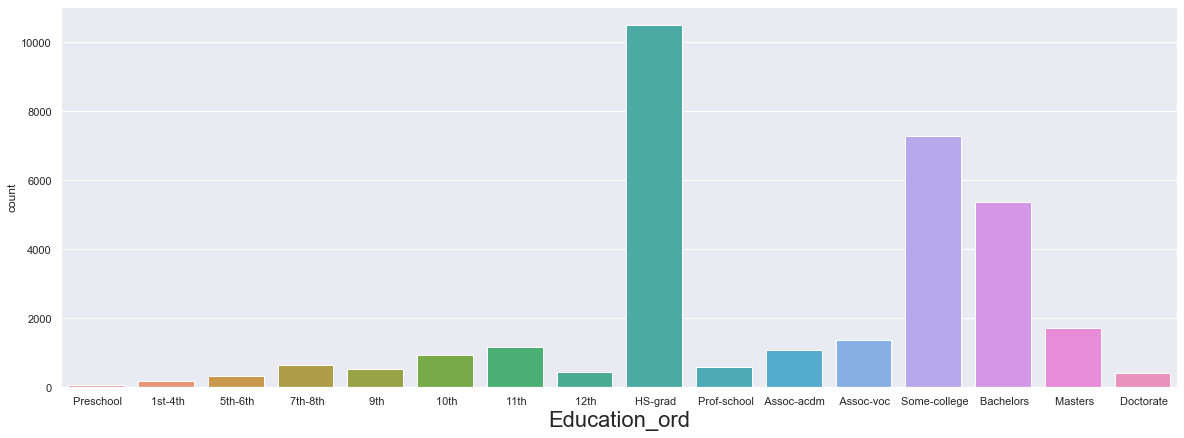

In [266]:
ax = plt.subplots(figsize = (20,7))
ax =sns.countplot(x='Education',data=df,orient='h',order=Education_ord )
ax.set_xlabel('Education_ord', fontsize = 22)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

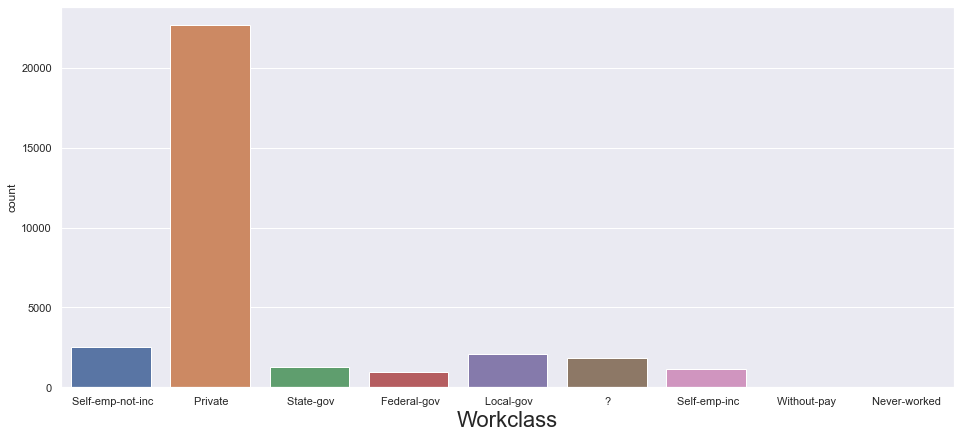

In [267]:
ax = plt.subplots(figsize = (16,7))
ax =sns.countplot(x='Workclass',data=df,orient='h')
ax.set_xlabel('Workclass', fontsize = 22)
df['Workclass'].value_counts()

From given data work class of most of applicants is Private sector, where the 2nd highest is self employed

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

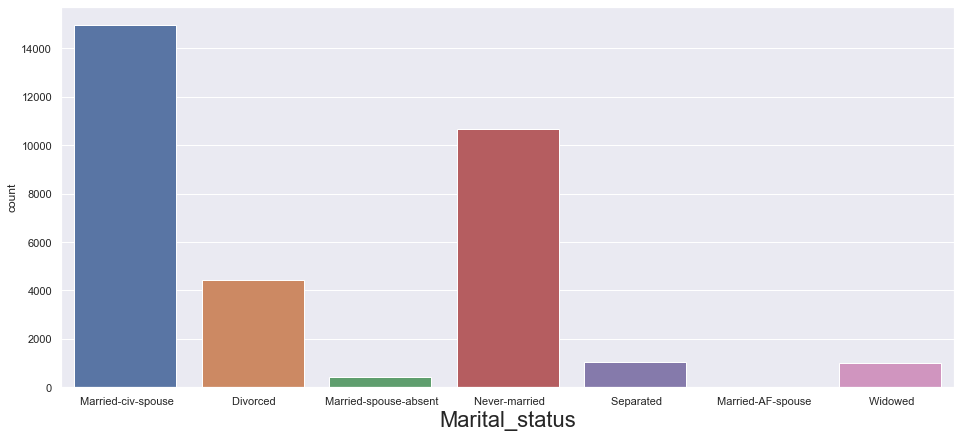

In [268]:
ax = plt.subplots(figsize = (16,7))
ax =sns.countplot(x='Marital_status',data=df,orient='h')
ax.set_xlabel('Marital_status', fontsize = 22)
df['Marital_status'].value_counts()

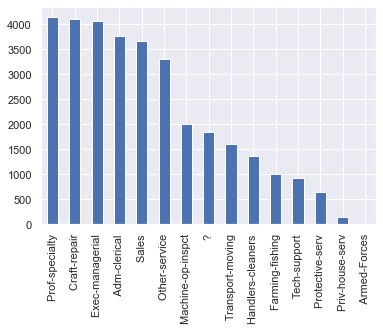

In [269]:
import seaborn as sns; 
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

df['Occupation'].value_counts().plot(kind="bar")

plt.show()

In [270]:
# create object of ordinal encoder
ord_enc = OrdinalEncoder()

In [271]:
#Label by using labelencoder
label_enc = LabelEncoder()

df['Income'] =label_enc.fit_transform(df['Income'])

In [272]:
#Transform categorical data into ordinal data
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1))

In [273]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income              int32
dtype: object

In [274]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


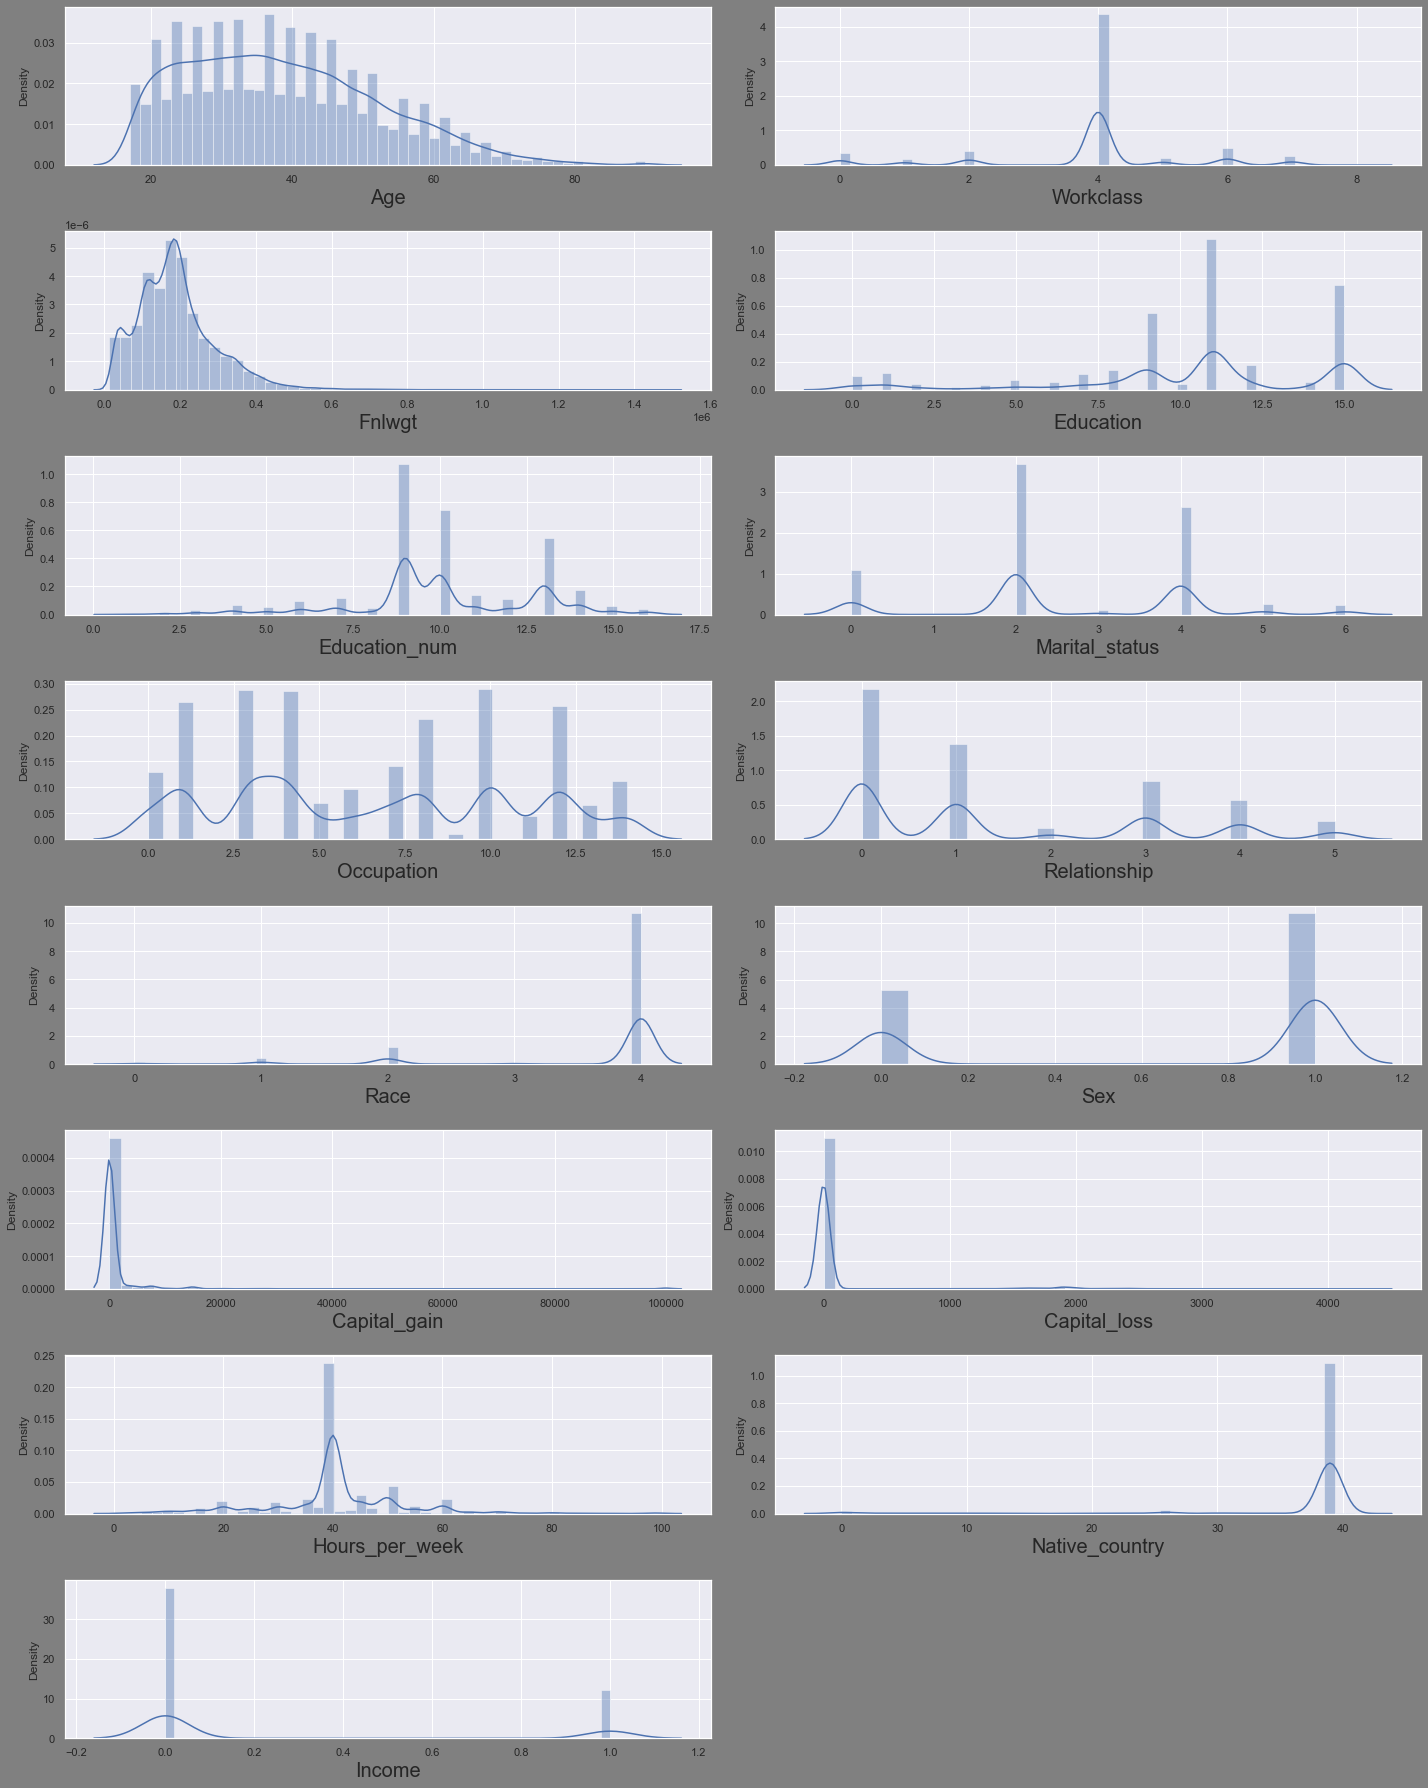

In [275]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(8,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Observation:

91.67% of data are having Zero's(0).
95.33% of data are Zero's(0).
Fnlwgt,Age are the only continuous columns

In [276]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

91.67% of data are having Zero's(0).

In [277]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

95.33% of data are Zero's(0).

In [278]:
#Due to >80% data are zero. we need to drop this columns
df=df.drop(columns = ['Capital_loss' , 'Capital_gain'], axis = 1)

In [279]:
df.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

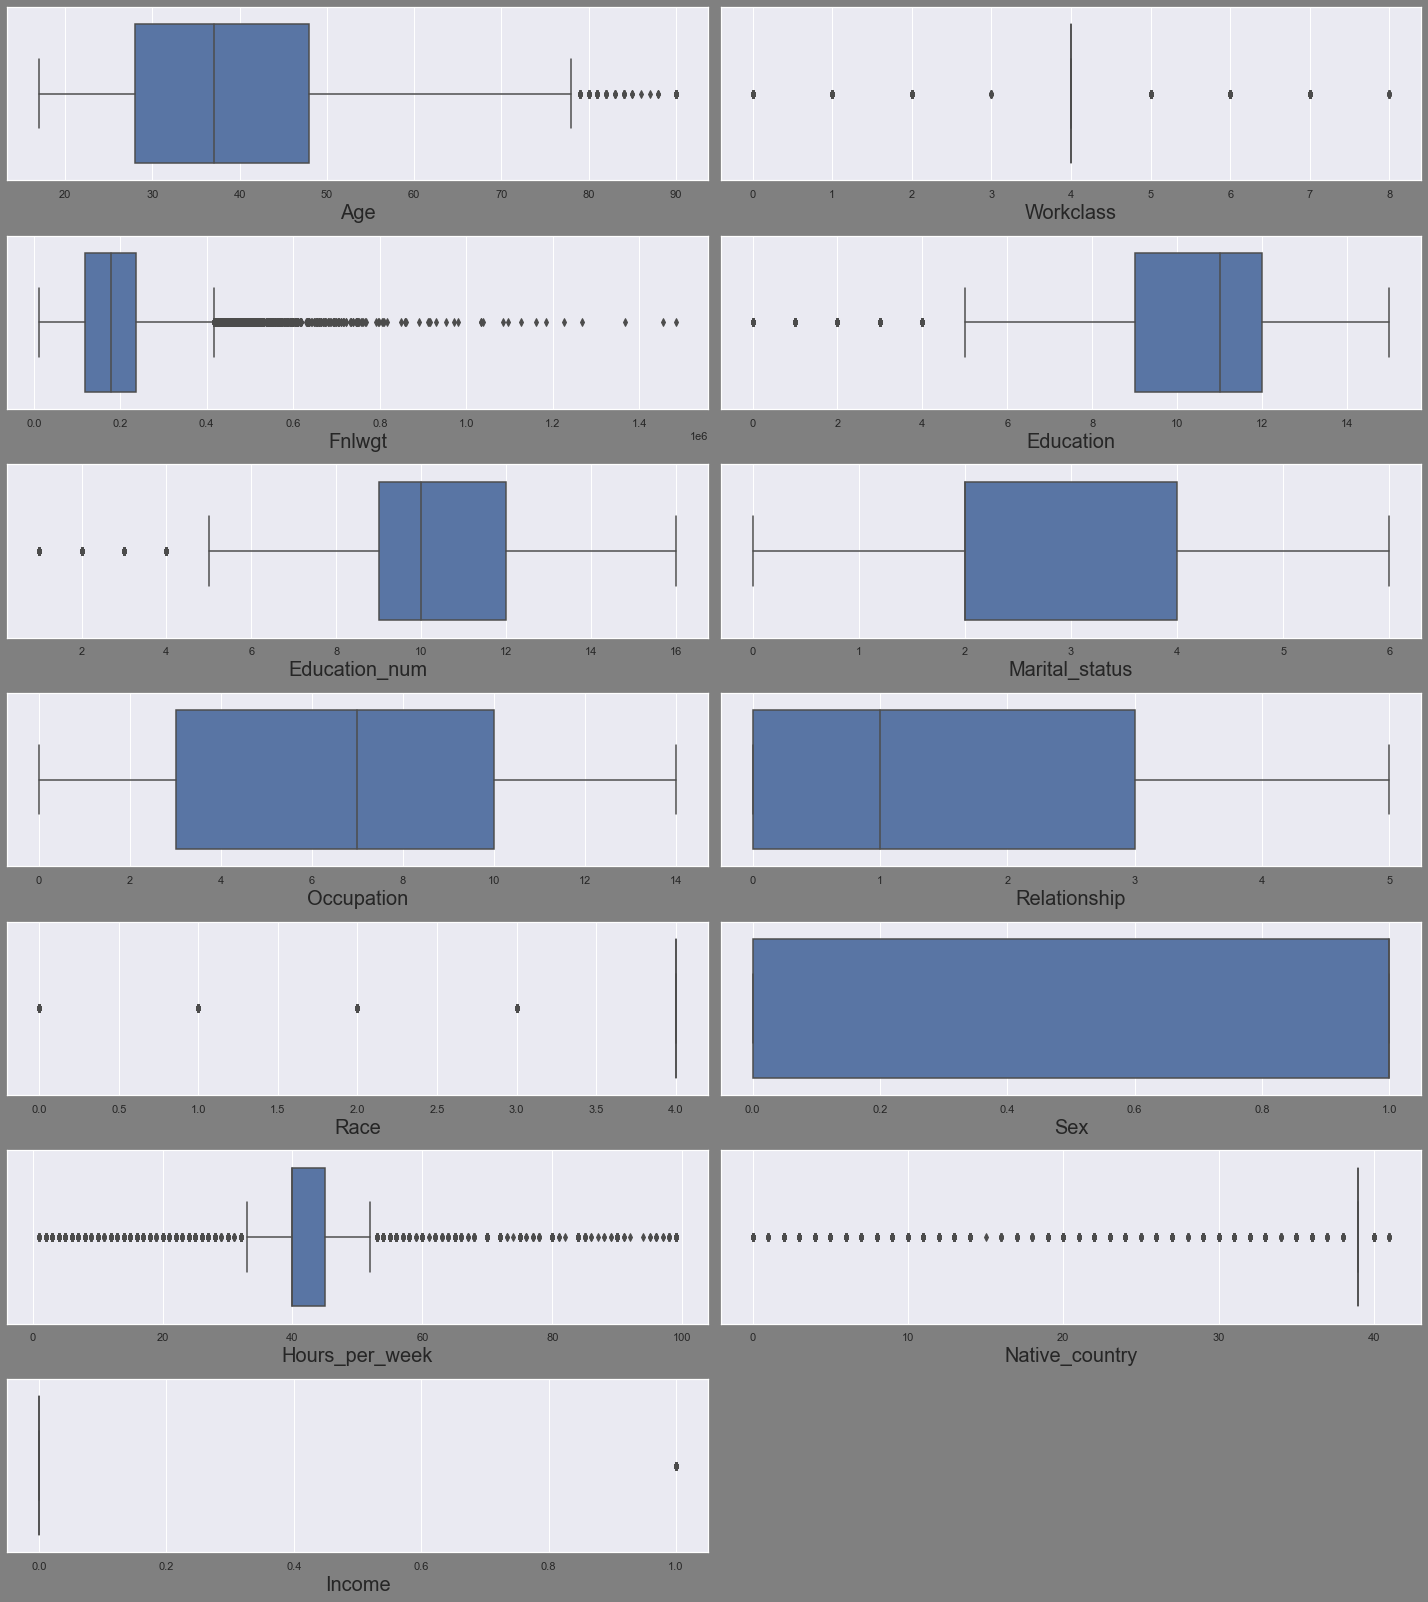

In [280]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(8,2,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [281]:
#distribution of target variable 
print("Total 0's are =>",df.iloc[:,-1].value_counts()[0])
print("Total 1,s are =>",df.iloc[:,-1].value_counts()[1])

Total 0's are => 24719
Total 1,s are => 7841


for removing the outlier from continuous variable we apply z_Score method we also try IQR method.We continuous with method which have less data loss

#### IQR

In [282]:
#We'll find the IQR to identify outlier

#1st quantile
q1 = df.quantile(0.25)

#3rd quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3 - q1

In [283]:
#Removing Outlier Using IQR Method
df_I_new = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

In [284]:
print("shape Before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_I_new.shape)
print("Precentage of data loss".ljust(20),":",(100-((df_I_new.shape[0]/df.shape[0])*100)),"%")

shape Before and after
shape before         : (32560, 13)
shape after          : (8529, 13)
Precentage of data loss : 73.80528255528256 %


72%  of data we are loosing in IQR method

#### Remove outlier by using Z_ Score 

In [316]:
#Removing outliers from contenious variable
from scipy.stats import zscore
z=np.abs(zscore(df[['Fnlwgt','Age']]))
df_Z_new = (z<3).all(axis = 1)
new_df=df[df_Z_new]

In [317]:
print("shape Before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",new_df.shape)
print("Precentage of data loss".ljust(20),":",(100-((new_df.shape[0]/df.shape[0])*100)),"%")

shape Before and after
shape before         : (32560, 13)
shape after          : (32093, 13)
Precentage of data loss : 1.4342751842751795 %


In [318]:
y = new_df['Income']
# y=y[2:]
print(y.shape)

(32093,)


In [319]:
x=new_df.drop(columns = 'Income')
print(x.shape)

(32093, 12)


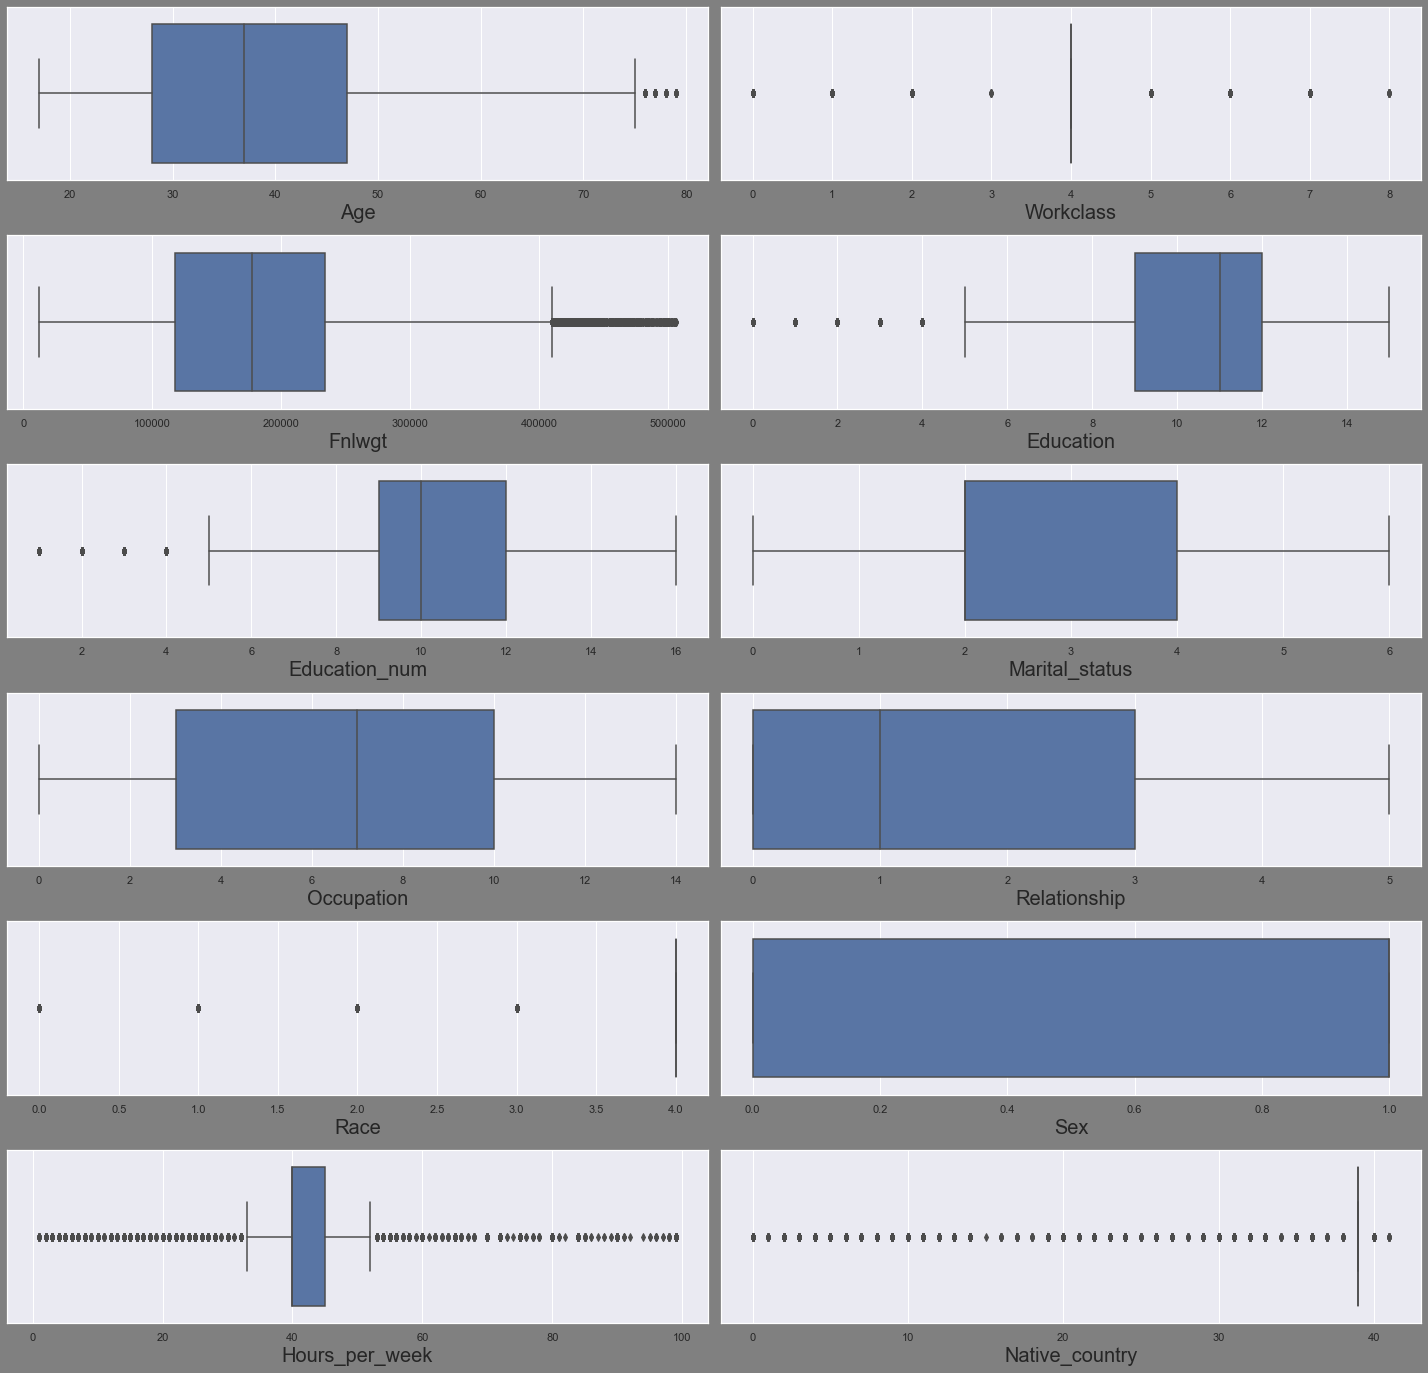

In [320]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in x:
    if plotnumber<=16:
        ax=plt.subplot(8,2,plotnumber)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Feature Selection 

In [321]:
#Seperate data set into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(22465, 12)
(9628, 12)


In [322]:
print(y_train.shape)
print(y_test.shape)

(22465,)
(9628,)


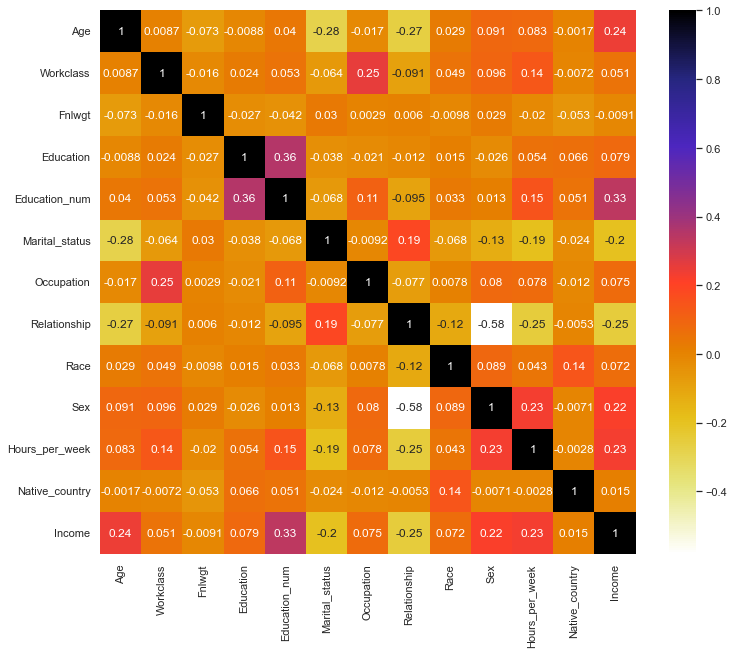

In [323]:
#Using  Person Correlation
plt.figure(figsize=(12,10))
cor=new_df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

#### Observation :

All features  of given data have there own uniqueness . half of features are almost equally contribute for predecting dependant variable.
we are not removing any feature from given dataset.

### Apply  Different algorithms on data to find the best accuracy score

In [334]:
# Try wih Random forest algo. with it's default parameters
#By using stratify = y ,Because data is imbalanced in case of Target Variable

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=437,stratify=y)
rf=DecisionTreeClassifier()
rf.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

92.16388845614581


In [335]:
#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[4579,  291],
       [ 212, 1337]], dtype=int64)

In [336]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4870
           1       0.82      0.86      0.84      1549

    accuracy                           0.92      6419
   macro avg       0.89      0.90      0.89      6419
weighted avg       0.92      0.92      0.92      6419



In [337]:
#By usinf CV
#Data is  imbalanced so we  use startified k-fold
from sklearn.model_selection import StratifiedKFold,cross_val_score
s_kfold = StratifiedKFold()
model=DecisionTreeClassifier()
scores=cross_val_score(model,x,y,cv=5)
print(np.mean(scores)*100)

77.50288988493426


In [338]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,rf.predict(x_train))*100)
print(metrics.accuracy_score(y_test,rf.predict(x_test))*100)

99.99221001791696
78.79732045489952


#### Apply Sampling techniques

In [339]:
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import KFold,cross_val_score

In [340]:
print("Total 0's are =>",new_df["Income"].value_counts()[0])
print("Total 1,s are =>",new_df["Income"].value_counts()[1])

Total 0's are => 24348
Total 1,s are => 7745


In [341]:
x = new_df[new_df.Income==0]
y = new_df[new_df.Income==1]

In [342]:
#checking train and test counts in given data set
print("Total no. of counts where Incme is <50k - ",x.shape)
print("Total no. of counts where Incme is >50k - ",y.shape)

Total no. of counts where Incme is <50k -  (24348, 13)
Total no. of counts where Incme is >50k -  (7745, 13)


In [343]:
#Targer Variable
y = new_df['Income']
# y=y[2:]
print(y.shape)

(32093,)


In [344]:
#dependant features
x=new_df.drop(columns = 'Income')
print(x.shape)

(32093, 12)


In [345]:
#split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [346]:
#conacat train data features ad dependant variables
x=pd.concat([x_train,y_train],axis=1)

In [347]:
#shape after taking data for training 
income_x=x[x.Income==0]
income_y=x[x.Income==1]

print(income_x.shape)
print(income_y.shape)

(18316, 13)
(5753, 13)


In [348]:
#upsampling
income_upsampling = resample(income_y,replace = True,n_samples = len(income_x),random_state = 20)

In [349]:
income_upsampling.shape

(18316, 13)

In [350]:
#concat majority and upsampled minority
upsampled=pd.concat([income_upsampling,income_x])

In [351]:
upsampled.shape

(36632, 13)

In [352]:
#seperating target and independant variables
y=upsampled['Income']
x=upsampled.drop(columns = ['Income'])

In [353]:
print(x.shape)
print(y.shape)

(36632, 12)
(36632,)


### DT

In [354]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.19,random_state=957)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

90.60479816118374


In [355]:
Train_accurecy = accuracy_score(y_train,dt.predict(x_train))
Test_accurecy = accuracy_score(y_test,y_pred)
print(Train_accurecy)
print(Test_accurecy)

1.0
0.9060479816118374


In [356]:
cv_score = cross_val_score(dt,x,y,cv = 5)
cv_mean=cv_score.mean()
print(f"at cross foald {5} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald 5 the cv score is 0.9055743541278476 and accuracy for training is 1.0 and accurecy for testing is 0.9060479816118374




### ENSEMBLE TECHNIQUE

In [357]:
#Building model (Hold out method) with ensemble technique
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=20)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

91.78660049627791


In [361]:
#in previous sell i used K_fold and found score , How can i implement that in below model building code.
#Previously i simply  used cross_val_score(model,x,y,cv=s_kfold)
#but in below i have to use x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.17,random_state=20)


#Building model (Hold out method)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=20)

svc = SVC()
svc.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

95.75682382133995


In [362]:
SVC()#default parameters used by Algoritham

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [363]:
Train_accurecy = accuracy_score(y_train,svc.predict(x_train))
Test_accurecy = accuracy_score(y_test,y_pred)

In [364]:
print(Train_accurecy)
print(Test_accurecy)

0.99982500349993
0.9575682382133995


In [365]:
cv_score = cross_val_score(rf,x,y,cv = 5)
cv_mean=cv_score.mean()
print(f"at cross foald {i} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald Income the cv score is 0.9583970160116448 and accuracy for training is 0.99982500349993 and accurecy for testing is 0.9575682382133995




#### GRID SEARCH CV

In [91]:
parameters = {'c':[0.01,2,3,4,5,6,7],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6]}
sv=SVC()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [366]:
#after applying GSCV on SVC() we ae getting fit alue of c and gamma as below
print(clf.best_params_)

{'C': 4, 'gamma': 0.1}


In [367]:
svc = SVC(C=4,gamma=0.1)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

95.80645161290322


In [368]:
cv_score = cross_val_score(svc,x,y,cv = 5)
cv_mean=cv_score.mean()
print(f"at cross foald {5} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald 5 the cv score is 0.9586973014101836 and accuracy for training is 0.99982500349993 and accurecy for testing is 0.9575682382133995




In [369]:
#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[3999,   12],
       [ 326, 3723]], dtype=int64)

##### After appplying the upsampling on data set we are getting >90% accurecy with model as well as after doing CV.Now we try with ensembling techniques if we get goood score we'll go ghed with that which gives us good result.

In [370]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4011
           1       1.00      0.92      0.96      4049

    accuracy                           0.96      8060
   macro avg       0.96      0.96      0.96      8060
weighted avg       0.96      0.96      0.96      8060



##### Find the other Evolution O/P by slicing confusion matrix

In [371]:
t_p=conf_mat[0][0]
f_p=conf_mat[0][1]
f_n=conf_mat[1][0]
t_n=conf_mat[1][1]

In [372]:
Precision = t_p/(t_p+f_p)
Precision

0.9970082273747195

In [373]:
Recall = t_p/(t_p+f_n)
Recall

0.9246242774566474

In [374]:
#our data is not completely balanced we should consider f1 score more than accurecy
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9594529750479847

In [375]:
auc = roc_auc_score(y_test,y_pred)
auc

0.9582472601432747

In [376]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

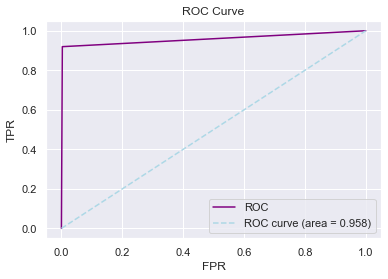

In [377]:
plt.plot(fpr,tpr,color='purple',label='ROC')
plt.plot([0,1],[0,1],color='lightblue',linestyle='--',label='ROC curve (area = %0.3f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

##### Almost 95% area is covered by Curve

Model accurecy which we are getting 95% which shows that the model is performing well.
After making data balanced by using upsampling we are getting good results , so we are Continue  with same 

In [378]:
#Saving the model
import pickle
filename = 'income.pkl'
pickle.dump(svc,open(filename,'wb'))

### Conclusion :

In [379]:
loaded_model = pickle.load(open('income.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9580645161290322


In [380]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=["predicted","original"])

In [382]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059
predicted,0,1,1,1,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
original,0,1,1,1,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1


In [385]:
with pd.option_context("display.max_columns",8060,'display.max_colwidth',150):display(conclusion)

0     1     2     3     4     5     6     7     8     9     10    \
predicted     0     1     1     1     1     0     1     0     0     1     1   
original      0     1     1     1     1     0     1     0     0     1     1   

           11    12    13    14    15    16    17    18    19    20    21    \
predicted     0     1     0     1     0     1     1     1     1     0     1   
original      0     1     0     1     0     1     1     1     1     0     1   

           22    23    24    25    26    27    28    29    30    31    32    \
predicted     0     1     0     1     1     1     0     1     0     0     1   
original      0     1     0     1     1     1     0     1     0     0     1   

           33    34    35    36    37    38    39    40    41    42    43    \
predicted     0     0     1     0     0     1     1     1     0     1     0   
original      0     0     1     0     0     1     1     1     0     1     0   

           44    45    46    47    48    49    50    51    52    53    54    \
predicted     0     0     1     1     0     0     1     1     0     1     0   
original      0     0     1     1     0     0     1     1     0     1     0   

           55    56    57    58    59    60    61    62    63    64    65    \
predicted     0     1     0     0     1     1     1     1     0     1     1   
original      0     1     0     0     1     1     1     1     0     1     1   

           66    67    68    69    70    71    72    73    74    75    76    \
predicted     0     0     1     0     1     0     1     0     0     0     0   
original      0     0     1     0     1     0     1     0     0     0     0   

           77    78    79    80    81    82    83    84    85    86    87    \
predicted     1     1     1     1     1     1     0     0     1     1     0   
original      1     1     1     1     1     1     0     0     1     1     0   

           88    89    90    91    92    93    94    95    96    97    98    \
predicted     0     1     0     0     0     0     1     0     0     0     1   
original      0     1     0     0     0     0     1     0     0     0     1   

           99    100   101   102   103   104   105   106   107   108   109   \
predicted     0     1     1     0     1     1     1     0     0     0     0   
original      0     1     1     0     1     1     1     0     0     0     0   

           110   111   112   113   114   115   116   117   118   119   120   \
predicted     1     0     0     0     0     0     1     1     0     0     1   
original      1     0     0     0     0     0     1     1     0     0     1   

           121   122   123   124   125   126   127   128   129   130   131   \
predicted     1     0     1     0     0     0     0     1     0     0     1   
original      1     0     1     0     0     0     0     1     0     0     1   

           132   133   134   135   136   137   138   139   140   141   142   \
predicted     1     0     1     1     0     0     0     1     1     1     1   
original      1     0     1     1     0     0     0     1     1     1     1   

           143   144   145   146   147   148   149   150   151   152   153   \
predicted     0     1     0     0     0     0     1     0     1     1     1   
original      0     1     0     0     0     0     1     0     1     1     1   

           154   155   156   157   158   159   160   161   162   163   164   \
predicted     1     1     0     1     0     0     1     0     1     0     0   
original      1     1     0     1     0     0     1     0     1     0     0   

           165   166   167   168   169   170   171   172   173   174   175   \
predicted     0     1     0     1     1     1     1     0     1     0     1   
original      0     1     0     1     1     1     1     0     1     0     1   

           176   177   178   179   180   181   182   183   184   185   186   \
predicted     1     0     0     1     1     0     0     0     1     1     1   
original      1     0     0     1     1     0